In [1]:
from scipy import *
from numpy import *
import pickle
from skimage import io, filters, measure
from scipy import ndimage
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
cmRed  =LinearSegmentedColormap.from_list("cmRed",   [(0,0,0),(1,0,0)], N=256)
cmGreen=LinearSegmentedColormap.from_list("cmGreen", [(0,0,0),(0,1,0)], N=256)
cmGray =LinearSegmentedColormap.from_list("cmGreen", [(0,0,0),(1,1,1)], N=256)
imgLim=lambda im,m,M: ((im*1.-m)/(M-m)).clip(0,1)
imgLimNoClip=lambda im,m,M: ((im*1.-m)/(M-m))


# 1. Morphology of the locus pre- vs post-injection

In [2]:
dataPath='/Volumes/AC-disk8/chromag_data/pre-post-inj_analysis/'

filesAndCoos=[
    ["20210719_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos2_1-inj_1_MMStack_Pos0.ome.tif", "cell0", 577, 492, 10, -0.4457],
    ["20210719_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos2_1-inj_2_MMStack_Pos0.ome.tif", "cell0", 586, 508, 8, -0.4457],
    ["20210719_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos3_1-inj_1_MMStack_Pos0.ome.tif", "cell1", 682, 612, 10, -0.8573],
    ["20210719_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos3_1-inj_2_MMStack_Pos0.ome.tif", "cell1", 680, 623, 10, -0.8573],
    ["20210719_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos6_1-inj_1_MMStack_Pos0.ome.tif", "cell0", 510, 542, 12, -2.1061],
    ["20210719_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos6_1-inj_2_MMStack_Pos0.ome.tif", "cell0", 508, 538, 11, -2.1061],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos4_1-inj_1_MMStack_Pos0.ome.tif", "cell0", 618, 651, 9, -0.1873],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos4_1-inj_3_MMStack_Pos0.ome.tif", "cell0", 616, 647, 10, -0.1873],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos5_1-inj_1_MMStack_Pos0.ome.tif", "cell1", 644, 545, 11, -0.0595],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos5_1-inj_2_MMStack_Pos0.ome.tif", "cell1", 633, 544, 12, -0.0595],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos6_1-inj_1_MMStack_Pos0.ome.tif", "cell1", 857, 209, 8, -2.1454],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos6_1-inj_3_MMStack_Pos0.ome.tif", "cell1", 855, 184, 10, -2.1454],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos6_1-inj_1_MMStack_Pos0.ome.tif", "cell2", 484, 399, 10, -2.7405],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos6_1-inj_3_MMStack_Pos0.ome.tif", "cell2", 480, 392, 14, -2.7405],
    #["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos7_1-inj_1_MMStack_Pos0.ome.tif", "cell0", 392, 312, 9, 2.4784],  Excluded because timetrace is incomplete
    #["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos7_1-inj_3_MMStack_Pos0.ome.tif", "cell0", 387, 329, 12, 2.4784],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos7_1-inj_1_MMStack_Pos0.ome.tif", "cell2", 641, 513, 10, -2.9675],
    ["20210721_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos7_1-inj_3_MMStack_Pos0.ome.tif", "cell2", 647, 501, 12, -2.9675],
    #["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos0_1-inj_2_MMStack_Pos0.ome.tif", "cell2", 671, 766, 11, -0.7676],  Excluded because timetrace is incomplete
    #["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos0_1-inj_3_MMStack_Pos0.ome.tif", "cell2", 680, 773, 6, -0.7676],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos0_1-inj_2_MMStack_Pos0.ome.tif", "cell3", 552, 615, 14, -0.7996],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos0_1-inj_3_MMStack_Pos0.ome.tif", "cell3", 560, 614, 9, -0.7996],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos0_1-inj_2_MMStack_Pos0.ome.tif", "cell4", 554, 574, 8, -0.8459],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos0_1-inj_3_MMStack_Pos0.ome.tif", "cell4", 543, 574, 0, -0.8459],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos4_1-inj_1_MMStack_Pos0.ome.tif", "cell1", 85, 983, 8, 0.4740],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos4_1-inj_2_MMStack_Pos0.ome.tif", "cell1", 84, 981, 9, 0.4740],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos8_1-inj_1_MMStack_Pos0.ome.tif", "cell0", 362, 317, 11, 2.2871],
    ["20210723_U2OS-263-tetR-mCherry-aGFP_ferritin-H_Pos8_1-inj_2_MMStack_Pos0.ome.tif", "cell0", 358, 320, 13, 2.2871],
]



In [3]:
if 0: #### Either reload data from  original files ...
    w=30
    lIm1=[]
    for fn,cell,x,y,z,Fangle in filesAndCoos:
        #im=io.imread(dataPath+fn)[:,z,y-w//2:y+w//2+1,x-w//2:x+w//2+1]

        im=io.imread(dataPath+fn)[:,z,y-(2*w)//2:y+(2*w)//2+1,x-(2*w)//2:x+(2*w)//2+1]
        im=r_[ im, array([filters.difference_of_gaussians(im[1],.8,10)]) ]
        im=ndimage.rotate(im, angle=180-Fangle*180/pi, axes=(2,1), reshape=False)
        im=im[:,im.shape[1]//2-w//2:im.shape[1]//2+w//2+1,im.shape[2]//2-w//2:im.shape[2]//2+w//2+1]

        #lIm1.append(r_[ im, array([filters.difference_of_gaussians(im[1],.8,10)]) ])
        lIm1.append(im)
    lIm1=array(lIm1)
    #lIm1=lIm1.reshape(*((-1,2,)+lIm1.shape[1:]))
    #r_[ lIm1, array([lIm1.mean(0)]) ]
    
else: ### ... or load pickled data.
    #pickle.dump(lIm1,open('pre-post-inj_lIm_w20.pickle','wb'))
    lIm1=pickle.load(open('pre-post-inj_lIm_w20.pickle','rb')); w=30 

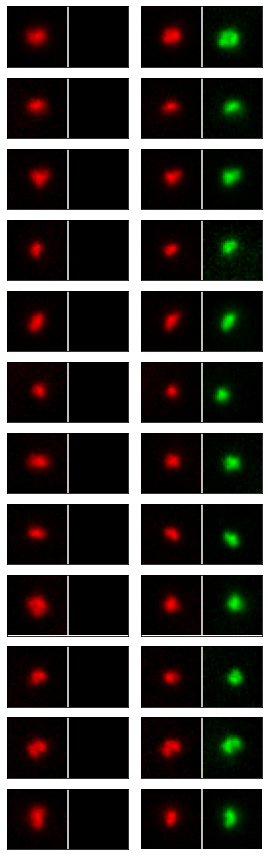

In [4]:
fig,ax=plt.subplots(len(lIm1)//2,2,figsize=(4,1.*len(lIm1)/2))
ax_=ax.flatten()
for i,im in enumerate(lIm1):
    plt.sca(ax_[i])
    imRef=lIm1[i-i%2+1]
    plt.imshow(r_[cmRed(  imgLim(im[2],quantile(im[2].flatten()   ,.2),1.*max(im[2].flatten()   ))).swapaxes(0,1),
                  cmGreen(imgLim(im[0],quantile(imRef[0].flatten(),.2),1.*max(imRef[0].flatten()))).swapaxes(0,1),].swapaxes(0,1))
    plt.axvline(w+1,c='w');
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
for j in range(i,len(ax_)): ax_[j].set_axis_off()
plt.tight_layout()
plt.savefig('pre-post-inj_img.pdf')

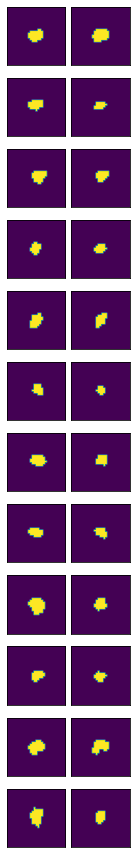

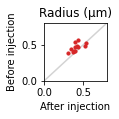

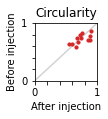

In [5]:
fig,ax=plt.subplots(len(lIm1)//2,2,figsize=(2,1.*len(lIm1)/2))
ax_=ax.flatten()
res1=[]

for i,im in enumerate(lIm1):
    res1.append([])
    plt.sca(ax_[i])
    im=im[2]; im=im-quantile(im.flatten(),.2); im=im/im.max(); im=(im>.5)*1;
    #im=im[2]; im=im-quantile(im.flatten(),.2); im=im/im.mean(); im=(im>7.)*1;
    plt.imshow(im)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    a=measure.regionprops(im)[0]
    res1[-1].append([a.area*.13**2,
                    (a.minor_axis_length*a.major_axis_length)**.5*.13/2,
                    a.minor_axis_length/a.major_axis_length])
res1=array(res1).reshape(-1,2,3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(1.12,1.06))
plt.scatter(res1[:,1,1], res1[:,0,1],s=10,c='C3')
plt.plot(r_[0,1.6],r_[0,1.6],c='lightgray',zorder=0); 
plt.title("Radius (µm)"); plt.xlabel('After injection'); plt.ylabel('Before injection'); 
plt.xticks(r_[:1.6:.5]); plt.yticks(r_[:1.6:.5]); 
plt.xlim(0,.8); plt.ylim(0,.8);
plt.savefig('pre-post-inj_radius.pdf')

plt.figure(figsize=(1.12,1.06))
plt.scatter(res1[:,1,2], res1[:,0,2],s=10,c='C3')
plt.plot(r_[0,1.6],r_[0,1.6],c='lightgray',zorder=0); 
plt.title("Circularity"); plt.xlabel('After injection'); plt.ylabel('Before injection'); 
plt.xticks([0,.2,.4,.6,.8,1],['0','','','','','1']); plt.yticks([0,.2,.4,.6,.8,1],['0','','','','','1']); 
plt.xlim(0,1); plt.ylim(0,1);
plt.savefig('pre-post-inj_circularity.pdf')


--------
-------

# 2. Morphology of the locus during pull-release experiments

### Inputs

In [6]:
dataPathTraj= '../../data/2-trajectory_files/30min-PR/'
dataPathTiffs='../../data/1-TIFF_files/30min-PR/'
basenames = [ # File name, SiR-DNA normalization
    '20190410_Pos20_cell0_',
    '20190415_Pos1_cell0_',
    '20191217_Pos15_cell0_',
    '20191217_Pos22_cell3_',
    '20191223_Pos0_cell0_',
    '20191223_Pos2_cell0_',
    '20191223_Pos11_cell0_',
    '20200221_Pos4_cell0_',
    '20191217_Pos22_cell0',
    '20191217_Pos25_cell0',
    '20191223_Pos10_cell0',
    '20191223_Pos11_cell1',
    '20200221_Pos5_cell0',
    '20210719_Pos2_cell0',
    '20210719_Pos3_cell1',
    '20210719_Pos6_cell0',
    '20210721_Pos4_cell0',
    '20210721_Pos5_cell1',
    '20210721_Pos6_cell1',
    '20210721_Pos6_cell2',
    '20210721_Pos7_cell0',
    '20210721_Pos7_cell2',
    '20210721_Pos9_cell0',
    '20210723_Pos0_cell0',
    '20210723_Pos0_cell2',
    '20210723_Pos0_cell3',
    '20210723_Pos0_cell4',
    '20210723_Pos1_cell0',
    '20210723_Pos1_cell2',
    '20210723_Pos3_cell0',
    '20210723_Pos3_cell1',
    '20210723_Pos3_cell2',
    '20210723_Pos4_cell0',
    '20210723_Pos4_cell1',
    '20210723_Pos8_cell0',
]
firstFrameMissing=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
release_times_30min = 60*r_[53.37, 60.48, 33.18, 33.18, 30.00, 30.00, 30.00, 30.10,
                            33.18, 33.18, 30.00, 30.00, 30.10, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, 30.00, ] # (in s) From labjournals and image timestamps
incl_completeTraces=r_[  2,3,4,    7,8,9,      12,13,14,15,16,17,18,19,   21,22,23,   25,26,27,28,29,30,31,32,33,34] # All complete traces
incl_prePostInj=r_[13,14,15,16,17,18,19,21,25,26,32,34] # Same cells as for the section above on pre- vs post-injection comparison

w=90


In [7]:
# Data from fig2 notebook, obtained by executing:
# >> array([ptsForFit_P[i][1]/(5*60)**.5/ptsForFit_P[i][0] for i in r_[:35]])

forceDisplCoef=array([0.15268421, 0.11713949, 0.30549107, 0.00919281, 0.40474683,
                      0.23878753, 0.13488692, 0.28586637, 0.05876955, 0.28860818,
                      0.31726396, 0.40702437, 0.12839601, 0.06971258, 0.0892506 ,
                      0.1344475 , 0.18228408, 0.05462616, 0.10035475, 0.2853543 ,
                      0.30008096, 0.46903676, 0.10963526, 0.34065294, 0.49930691,
                      0.09419092, 0.30069158, 0.10157869, 0.10297667, 0.34149767,
                      0.12798164, 0.07913881, 0.30376179, 0.15390367, 0.0903663 ]) # in um/s^0.5/pN


### Load data

In [8]:

if 1: #### Either reload data from  original files ...

    lIm2=[]        
    for i,bname in enumerate(basenames):
        #if i<20: continue
        print(bname)
        lIm2.append([])

        traj=loadtxt(dataPathTraj+bname+'.txt')
        im=io.imread(dataPathTiffs+bname+'.tif')
        if bname[-1]=='_': im=rollaxis(im,4,2)
        #im=im[:,:,:3]


        # Timepoint before 0min
        t=where(traj[:,0]<0)[0][-1]+firstFrameMissing[i]
        x,y,z=(traj[t][4:7]+.5).astype(int)
        imB=roll(roll(im[t],-(x-w//2),3)[:,:,:,:w+1],-(y-w//2),2)[:,:,:w+1]
        imB=imB[max(z-2,0):min(z+3,imB.shape[0])].max(0)
        if imB.shape[0]==3: imB=r_[imB,0*imB[[0]]]
        else: imB=r_[imB[:3], (imB[[3]]==imB[3,w//2,w//2])*1.]
        lIm2[-1].append(imB)

        # Timepoint closest to 5min
        t=(abs(traj[:,0]-5*60)).argsort()[0]
        x,y,z=(traj[t][4:7]+.5).astype(int)
        imB=roll(roll(im[t],-(x-w//2),3)[:,:,:,:w+1],-(y-w//2),2)[:,:,:w+1]
        imB=imB[max(z-2,0):min(z+3,imB.shape[0])].max(0)
        if imB.shape[0]==3: imB=r_[imB,0*imB[[0]]]
        else: imB=r_[imB[:3], (imB[[3]]==imB[3,w//2,w//2])*1.]
        lIm2[-1].append(imB)

        # Timepoint before 30min
        t=where(traj[:,0]<30*60)[0][-1]
        #t=where(traj[:,0]<release_times_30min[i])[0][-1]
        x,y,z=(traj[t][4:7]+.5).astype(int)
        imB=roll(roll(im[t],-(x-w//2),3)[:,:,:,:w+1],-(y-w//2),2)[:,:,:w+1]
        imB=imB[max(z-2,0):min(z+3,imB.shape[0])].max(0)
        if imB.shape[0]==3: imB=r_[imB,0*imB[[0]]]
        else: imB=r_[imB[:3], (imB[[3]]==imB[3,w//2,w//2])*1.]
        lIm2[-1].append(imB)

        # Timepoint closest to 5min after release
        t=(abs(traj[:,0]-(release_times_30min[i]+5*60))).argsort()[0]
        x,y,z=(traj[t][4:7]+.5).astype(int)
        imB=roll(roll(im[t],-(x-w//2),3)[:,:,:,:w+1],-(y-w//2),2)[:,:,:w+1]
        imB=imB[max(z-2,0):min(z+3,imB.shape[0])].max(0)
        if imB.shape[0]==3: imB=r_[imB,0*imB[[0]]]
        else: imB=r_[imB[:3], (imB[[3]]==imB[3,w//2,w//2])*1.]
        lIm2[-1].append(imB)

        # Timepoint closest to 20min after release
        #t=where(traj[:,0]<release_times_30min[i]+20*60)[0][-1]
        t=(abs(traj[:,0]-(release_times_30min[i]+20*60))).argsort()[0]
        x,y,z=(traj[t][4:7]+.5).astype(int)
        imB=roll(roll(im[t],-(x-w//2),3)[:,:,:,:w+1],-(y-w//2),2)[:,:,:w+1]
        imB=imB[max(z-2,0):min(z+3,imB.shape[0])].max(0)
        if imB.shape[0]==3: imB=r_[imB,0*imB[[0]]]
        else: imB=r_[imB[:3], (imB[[3]]==imB[3,w//2,w//2])*1.]
        lIm2[-1].append(imB)

        del im, imB
    lIm2=array(lIm2)


else: ### ... or load pickled data.
    
    #pickle.dump(lIm2,open('pull_lIm5_all.pickle','wb'))
    lIm2=pickle.load(open('pull_lIm5_all.pickle','rb'))


In [9]:
# Normalize SiR-DNA channel

for i,(im0,im5,im30,im5r,im20r) in enumerate(lIm2):
    for im in (im0,im5,im30,im5r,im20r):
        im[0]=imgLimNoClip(im[0],quantile(im[0],.05),quantile(im[0],.95))
    

-----------
## Before pull

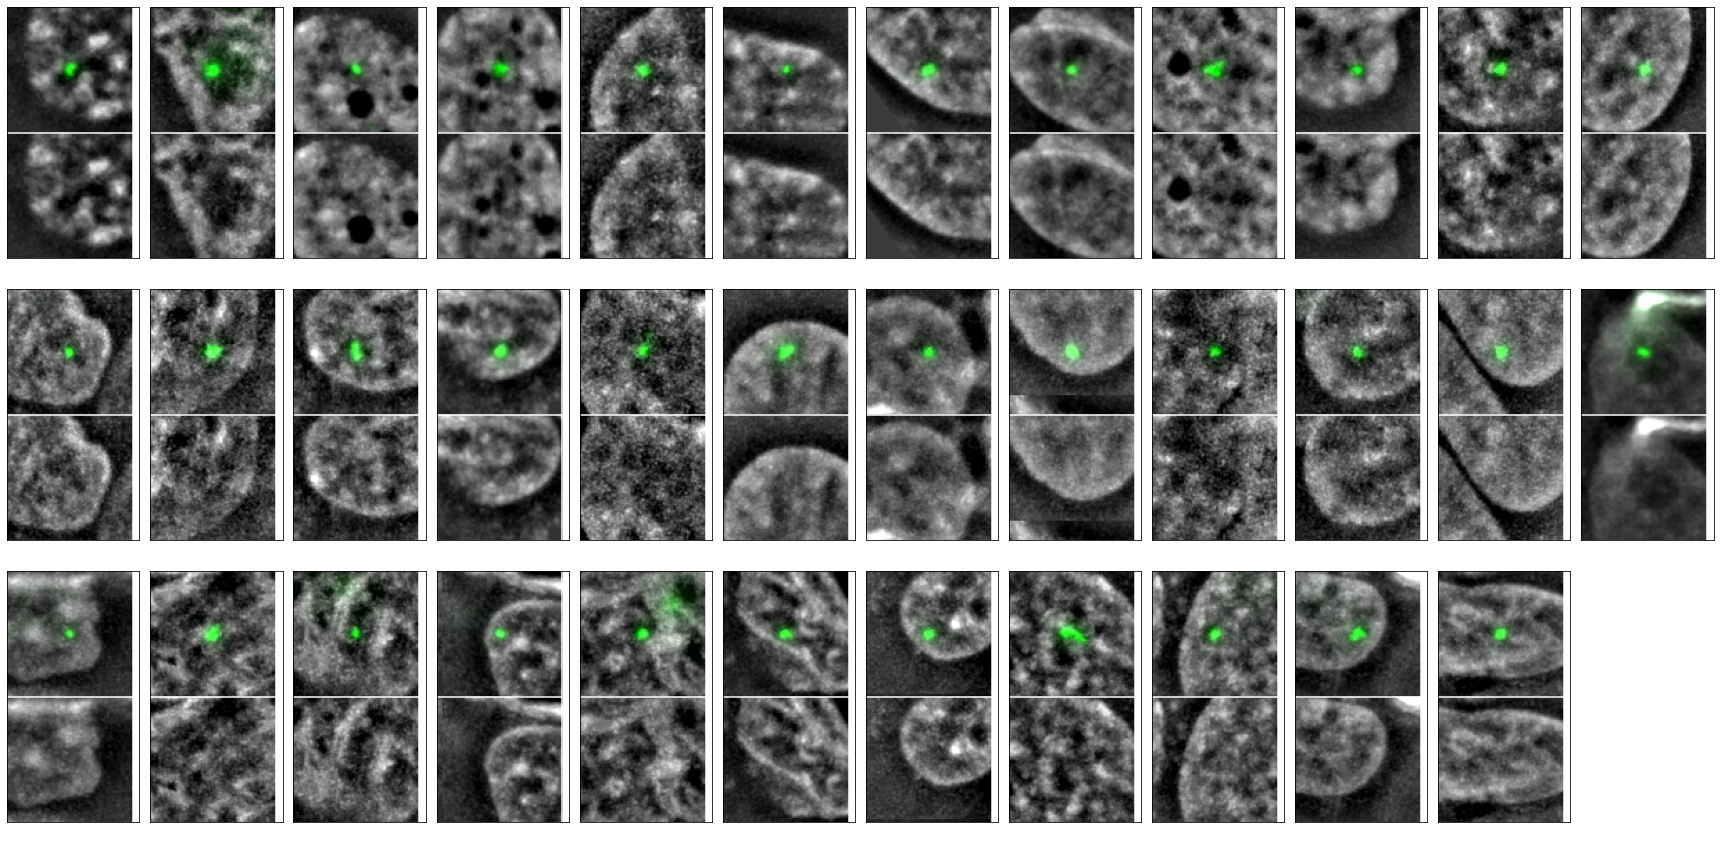

In [10]:
pltX=12
pltY=-((-len(lIm2))//pltX)
fig,ax=plt.subplots(pltY,pltX,figsize=(pltX*2,pltY*4))
ax_=ax.flatten()
for i,(im0,im5,im30,im5r,im20r) in enumerate(lIm2):
    im=im0
    plt.sca(ax_[i])
    plt.imshow(r_[cmGray( imgLim(im[0],-.1,1.7))+
                  cmGreen(imgLim(im[1],median(im[1].flatten()),max(im[1].flatten()))),
                  cmGray( imgLim(im[0],-.1,1.7))].clip(0,1))
    plt.axvline(w+1,c='w'); plt.axhline(w+1,c='w');
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
for j in range(i+1,len(ax_)): ax_[j].set_axis_off()
plt.tight_layout()
plt.savefig('all_loci_img_91px.pdf')


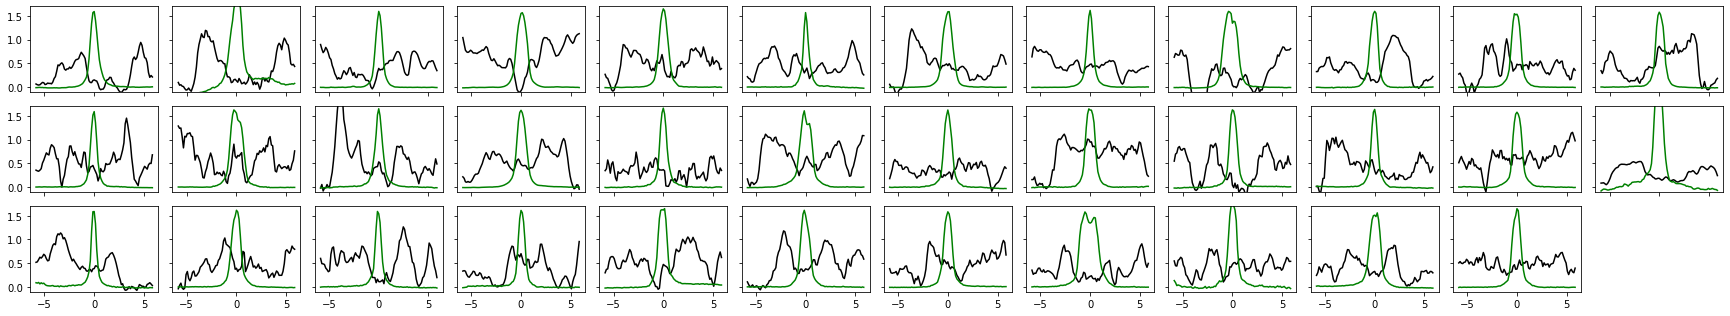

In [11]:
pltX=12
pltY=-((-len(lIm2))//pltX)
fig,ax=plt.subplots(pltY,pltX,sharex=True,sharey=True,figsize=(pltX*2,pltY*1.5))
ax_=ax.flatten()
x=r_[-w//2:w//2+1]*.13
for i,(im0,im5,im30,im5r,im20r) in enumerate(lIm2):
    im=im0
    plt.sca(ax_[i])
    plt.plot(x,im[0][w//2-1:w//2+2].mean(0),c='k')
    plt.plot(x,imgLimNoClip(im[1][w//2-1:w//2+2].mean(0),median(im[1].flatten()),max(im[1].flatten())/1.6),c='g')
        
for j in range(i+1,len(ax_)): ax_[j].set_axis_off()
plt.ylim(-.1,1.7)
plt.tight_layout()
plt.savefig('all_loci_plt.pdf')


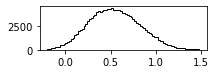

In [12]:
DNAdensities=[]
for i,(im0,im5,im30,im5r,im20r) in enumerate(lIm2):
    im=im0
    DNAdensities.append(im[0][where(im[3])])
DNAdensities=concatenate(DNAdensities)

plt.figure(figsize=(3,.8))
#plt.plot(sort(DNAdensities),r_[:100:1j*DNAdensities.shape[0]],c='k')
plt.hist(DNAdensities,bins=r_[-.2:1.5:.02],histtype='step',color='k')
plt.savefig('DNA_density_distr.pdf')

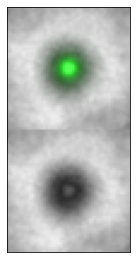

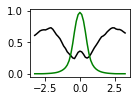

In [14]:
im0=lIm2.mean(0)[0]

imRot=array([ndimage.rotate(im0, angle=(random.rand()-.5)*360, axes=(2,1), reshape=False, mode='grid-wrap')for i in range(10)]).mean(0)[:,20:-20][:,:,20:-20]

fig=plt.figure(figsize=(2,4))
plt.imshow(r_[cmGray( imgLim(imRot[0],.3,.57))+
              cmGreen(imgLim(imRot[1],median(imRot[1].flatten()),1.2*max(imRot[1].flatten()))),
              cmGray( imgLim(imRot[0],.3,.57))].clip(0,1))
#plt.axvline(w+1,c='w'); plt.axhline(w+1,c='w');
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

plt.tight_layout()
plt.savefig('all_loci_mean_img_51px.pdf')

fig=plt.figure(figsize=(2,1.5))
x=r_[-w//2+20:w//2+1-20]*.13
plt.plot(x,imgLim(imRot[0][w//2-1-20:w//2+2-20].mean(0),.25,.65),c='k')
plt.plot(x,imgLim(imRot[1][w//2-1-20:w//2+2-20].mean(0),median(imRot[1].flatten()),1*max(imRot[1].flatten())),c='g')
plt.tight_layout()
plt.savefig('all_loci_mean_plt.pdf')



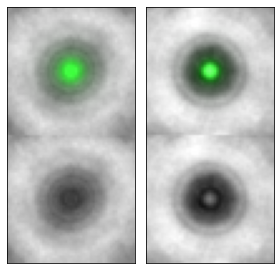

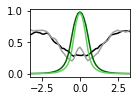

In [18]:
im0=lIm2[argsort(forceDisplCoef)][:10].mean(0)[0]
im1=lIm2[argsort(forceDisplCoef)][-10:].mean(0)[0]
w2=50

im0Rot=array([ndimage.rotate(im0, angle=random.rand()*360, axes=(2,1), reshape=False, mode='grid-wrap')for i in range(35)]).mean(0)
im1Rot=array([ndimage.rotate(im1, angle=random.rand()*360, axes=(2,1), reshape=False, mode='grid-wrap')for i in range(35)]).mean(0)


fig,ax=plt.subplots(1,2,figsize=(4,4))
for i,im in enumerate([im0Rot,im1Rot]):
    plt.sca(ax[i])
    plt.imshow(r_[(cmGray( imgLim(im[0],.3,.57))+
                   cmGreen(imgLim(im[1],median(im[1].flatten()),1.2*max(im[1].flatten())))) [:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1],
                   cmGray( imgLim(im[0],.3,.57)) [:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1]
                 ].clip(0,1))
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.tight_layout()
plt.savefig('slow-fast_loci_mean_img_51px.pdf')

fig=plt.figure(figsize=(2,1.5))
x=r_[-w//2:w//2+1]*.13
plt.plot(x,imgLim(im0Rot[0][w//2-1:w//2+2].mean(0),.25,.65),c='k')
plt.plot(x,imgLim(im1Rot[0][w//2-1:w//2+2].mean(0),.25,.65),c='#a0a0a0')
plt.plot(x,imgLim(im0Rot[1][w//2-1:w//2+2].mean(0),median(im0Rot[1].flatten()),1*max(im0Rot[1].flatten())),c='#006000')
plt.plot(x,imgLim(im1Rot[1][w//2-1:w//2+2].mean(0),median(im1Rot[1].flatten()),1*max(im1Rot[1].flatten())),c='#60d060')
plt.xlim(-w2//2*.13,w2//2*.13)
plt.tight_layout()
plt.savefig('slow-fast_loci_mean_plt.pdf')



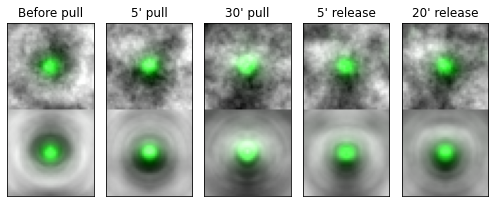

In [19]:
(im0,im5,im30,im5r,im20r)=lIm2[incl_completeTraces].mean(0)
w2=40
angleForAvg=60

lImRot=[]
fig,ax=plt.subplots(1,5,figsize=(7,2.8))
for i,im in enumerate((im0,im5,im30,im5r,im20r)):
    plt.sca(ax[i]); plt.title(["Before pull","5' pull","30' pull","5' release","20' release",][i])
    imRot=array([ndimage.rotate(im, angle=(random.rand()-.5)*angleForAvg, axes=(2,1), reshape=False, mode='grid-wrap')for i in range(50)]).mean(0)
    imRot=(imRot+imRot[:,:,::-1])/2
    plt.imshow(r_[(cmGray( imgLim(im[0],.28,.65))+
                   cmGreen(imgLim(im[1],median(im[1].flatten()),1.2*max(im[1].flatten())))) [:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1],
                  (cmGray( imgLim(imRot[0],.3,.6))+
                   cmGreen(imgLim(imRot[1],median(im[1].flatten()),1.2*max(im[1].flatten())))) [:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1],
                 ].clip(0,1))
    
    #plt.axvline(w+1,c='w'); plt.axhline(w+1,c='w');
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    lImRot.append(imRot)
plt.tight_layout()
plt.savefig('all_loci_mean_plt_throughout-PR.pdf')

if 0:
    fig,ax=plt.subplots(1,5,figsize=(10,1.5))
    ax_=ax.flatten()
    x=r_[-w//2:w//2+1]*.13
    #for i,im in enumerate((im0,im5,im30,im5r,im20r)):
    for i,im in enumerate(lImRot):
        plt.sca(ax_[i]);
        plt.plot(x,im[0][w//2-1:w//2+2].mean(0),c='k')
        plt.plot(x,imgLim(im[1][w//2-1:w//2+2].mean(0),median(im[1].flatten()),max(im[1].flatten())),c='g')
        plt.ylim(.2,.7)
        plt.xlim(-w2//2*.13,w2//2*.13)

    for j in range(i+1,len(ax_)): ax_[j].set_axis_off()
    plt.tight_layout()
    plt.show()



-----------
### Throughout pull-release experiment

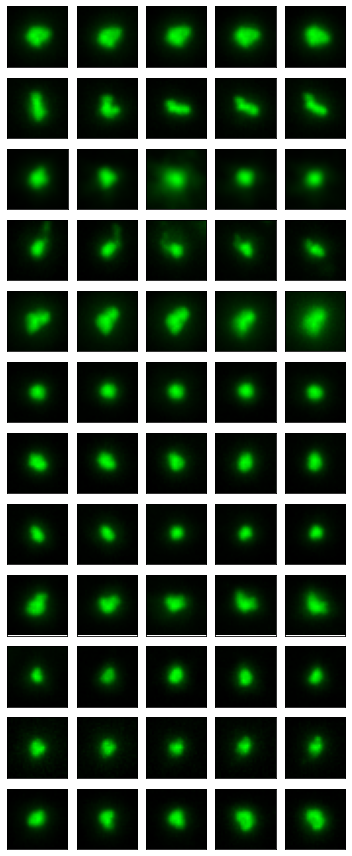

In [20]:
w2=30
fig,ax=plt.subplots(12,5,figsize=(5,12))
for i,(im0,im5,im30,im5r,im20r) in enumerate(lIm2[incl_prePostInj]):
    for j,im in enumerate((im0,im5,im30,im5r,im20r)):
        plt.sca(ax[i,j]);
        plt.imshow(r_[(cmGreen(imgLim(im[1],quantile(im[1].flatten(),.2),1.*max(im[1].flatten())))) [:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1],
                      #(cmGray( imgLim(im[0],  -.1,                    1.7                     ))) [:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1],
                     ].clip(0,1))
        plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.tight_layout()
plt.savefig('morphology-PR_img.pdf')


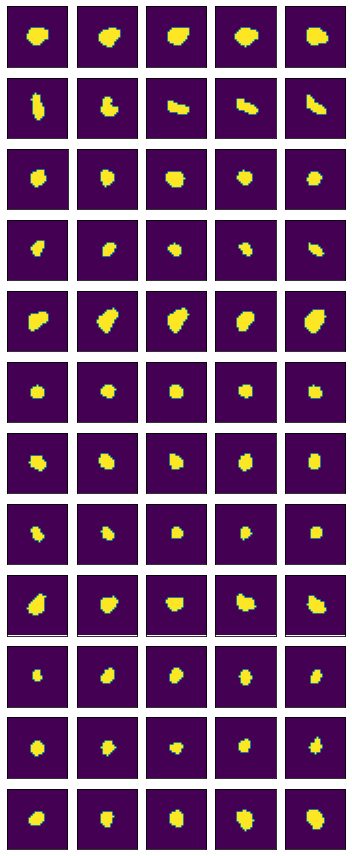

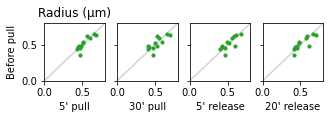

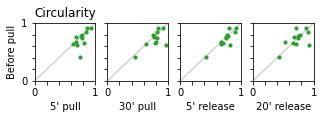

In [21]:
w2=30
fig,ax=plt.subplots(12,5,figsize=(5,12))
res2=[]
for i,(im0,im5,im30,im5r,im20r) in enumerate(lIm2[incl_prePostInj]):
    res2.append([])
    for j,im in enumerate((im0,im5,im30,im5r,im20r)):
        plt.sca(ax[i,j]);
        im=im[1][:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1]; im=im-quantile(im.flatten(),.2); im=im/im.max(); im=(im>.5)*1;
        #im=im[1][:,(w-w2)//2:(w+w2)//2+1][(w-w2)//2:(w+w2)//2+1]; im=im-quantile(im.flatten(),.2); im=im/im.mean(); im=(im>7.)*1;
        plt.imshow(im)
        plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
        a=measure.regionprops(im)[0]
        res2[-1].append([a.area*.13**2,
                        (a.minor_axis_length*a.major_axis_length)**.5*.13/2,
                        a.minor_axis_length/a.major_axis_length])
        #res2[-1].append((lambda a: 4*pi*a.area/(a.perimeter_crofton**2))(measure.regionprops(im)[0]))
res2=array(res2)
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,4,sharex='row',sharey='row',figsize=(5,1.06))
for i,label in enumerate(["5' pull", "30' pull", "5' release", "20' release"]):
    plt.sca(ax[i]);
    plt.scatter(res2[:,1+i,1], res2[:,0,1],s=10,c='C2')
    plt.plot(r_[0,1.6],r_[0,1.6],c='lightgray',zorder=0); 
    plt.xlabel(label);
    if i==0:
        plt.title("Radius (µm)")
        plt.ylabel('Before pull')
plt.xticks(r_[:1.6:.5]); plt.yticks(r_[:1.6:.5]); 
plt.xlim(0,.8); plt.ylim(0,.8);
plt.savefig('morphology-PR_radius.pdf')

fig,ax=plt.subplots(1,4,sharex='row',sharey='row',figsize=(5,1.06))
for i,label in enumerate(["5' pull", "30' pull", "5' release", "20' release"]):
    plt.sca(ax[i]);
    plt.scatter(res2[:,1+i,2], res2[:,0,2],s=10,c='C2')
    plt.plot(r_[0,1],r_[0,1],c='lightgray',zorder=0); 
    plt.xlabel(label);
    if i==0:
        plt.title("Circularity")
        plt.ylabel('Before pull')
plt.xticks([0,.2,.4,.6,.8,1],['0','','','','','1']); plt.yticks([0,.2,.4,.6,.8,1],['0','','','','','1']); 
plt.xlim(0,1); plt.ylim(0,1);
plt.savefig('morphology-PR_circularity.pdf')


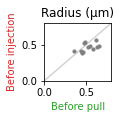

In [22]:
fig,ax=plt.subplots(1,1,sharex='row',sharey='row',figsize=(1.2,1.06))
plt.sca(ax);
plt.scatter(res2[:,0,1], res1[:,0,1],s=10,c='gray')
plt.plot(r_[0,1.6],r_[0,1.6],c='lightgray',zorder=0); 
plt.xlabel('Before pull',c='C2'); plt.ylabel('Before injection',c='C3');
plt.title("Radius (µm)")
plt.xticks(r_[:1.6:.5]); plt.yticks(r_[:1.6:.5]); 
plt.xlim(0,.8); plt.ylim(0,.8);
plt.show()

### Visualize timestamps in all 30'-PR movies

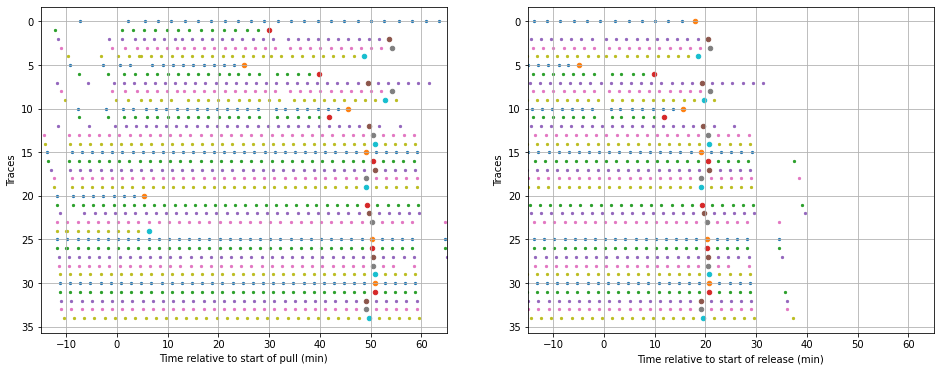

In [23]:
lTraj=[]
for bname in basenames:
    lTraj.append(loadtxt(dataPathTraj+bname+'.txt'))
    
fig,ax=plt.subplots(1,2,figsize=(16,6))
for i,traj in enumerate(lTraj):
    
    t0=where(traj[:,0]<0)[0][-1]+firstFrameMissing[i]                  # Timepoint before 0min
    
    t5=(abs(traj[:,0]-5*60)).argsort()[0]                              # Timepoint closest to 5min
    
    t30=where(traj[:,0]<30*60)[0][-1]                                  # Timepoint before 30min
    #t30=where(traj[:,0]<release_times_30min[i])[0][-1]                # Timepoint before release
    
    t5r=(abs(traj[:,0]-(release_times_30min[i]+5*60))).argsort()[0]    # Timepoint closest to 5min after release
    
    #t20r=where(traj[:,0]<release_times_30min[i]+20*60)[0][-1]         # Timepoint before 20min after release
    t20r=(abs(traj[:,0]-(release_times_30min[i]+20*60))).argsort()[0]  # Timepoint closest to 20min after release
    
    # Timepoint to highlight on graph
    t=t20r
    
    plt.sca(ax[0])
    plt.scatter(traj[:,0]/60,traj[:,0]*0+i,s=5)
    plt.scatter(traj[t,0]/60,traj[t,0]*0+i,s=20)
    plt.sca(ax[1])
    plt.scatter(traj[:,0]/60-release_times_30min[i]/60,traj[:,0]*0+i,s=5)
    plt.scatter(traj[t,0]/60-release_times_30min[i]/60,traj[t,0]*0+i,s=20)
    
plt.sca(ax[0]); plt.xlabel('Time relative to start of pull (min)'); plt.ylabel('Traces')
plt.xlim(-15,65); plt.grid(); plt.gca().invert_yaxis()
plt.sca(ax[1]); plt.xlabel('Time relative to start of release (min)'); plt.ylabel('Traces')
plt.xlim(-15,65); plt.grid(); plt.gca().invert_yaxis()

#plt.xlim(-.2,7); plt.grid()
plt.show()